
### 텐서플로우란 무엇일까?
> 텐서플로우는 초보 개발자부터 전문 개발자까지 모두가 인공지능(AI)의 딥러닝 모델을 개발할 수 있도록 한 AI 개발 프레임워크다. 즉 텐서플로우를 이용해 코드 몇 줄만으로 딥러닝 모델을 직접 작성할 수 있다. 지난 2015년 구글이 오픈소스로 공개했으며, 수많은 딥러닝·머신러닝 서비스들이 텐서플로우를 기반으로 개발됐다. AI 개발자들이 가장 흔히 사용하는 프레임워크로 꼽힌다.

- **NumPy** : ("넘파이"라 읽는다)는 행렬이나 일반적으로 대규모 다차원 배열을 쉽게 처리 할 수 있도록 지원하는 파이썬의 라이브러리
- **cv2** : OpenCV (Open source Computer Vision)는 실시간 컴퓨터 비젼을 처리하는 목적으로 만들어진 라이브러리
- **os** 모듈은 Operating System의 약자로서 운영체제에서 제공되는 여러 기능을 파이썬에서 수행할 수 있게 해줍니다. 예를 들어, 파이썬을 이용해 파일을 복사하거나 디렉터리를 생성하고 특정 디렉터리 내의 파일 목록을 구하고자 할 때 os 모듈을 사용하면 됩니다.



In [ ]:
# tensorflow 2+
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.models import load_model
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

plt.style.use('dark_background')

In [37]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [39]:
cd "/content/drive/MyDrive/Colab Notebooks/maskDetection"

/content/drive/MyDrive/Colab Notebooks/maskDetection


# Load Models

In [40]:
facenet = cv2.dnn.readNet('models/deploy.prototxt', 'models/res10_300x300_ssd_iter_140000.caffemodel')
model = load_model('models/mask_detector.model')

# Load Image

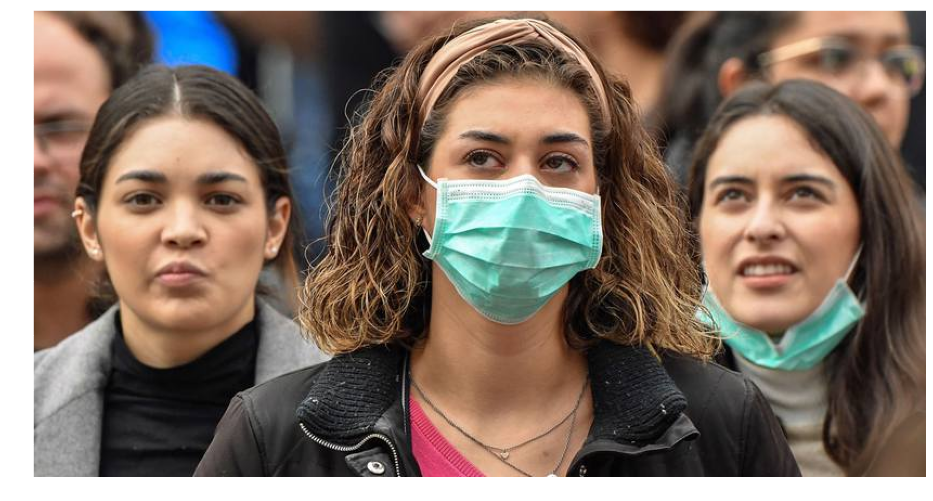

In [41]:
img = cv2.imread('imgs/pic2.jpg')
h, w = img.shape[:2] #높이 너비 1:2

plt.figure(figsize=(16, 10))
plt.imshow(img[:, :, ::-1]) #BGR->RGB

# Preprocess Image for Face Detection

In [42]:
blob = cv2.dnn.blobFromImage(img, scalefactor=1., size=(300, 300), mean=(104., 177., 123.))
facenet.setInput(blob)
dets = facenet.forward()

# Detect Faces

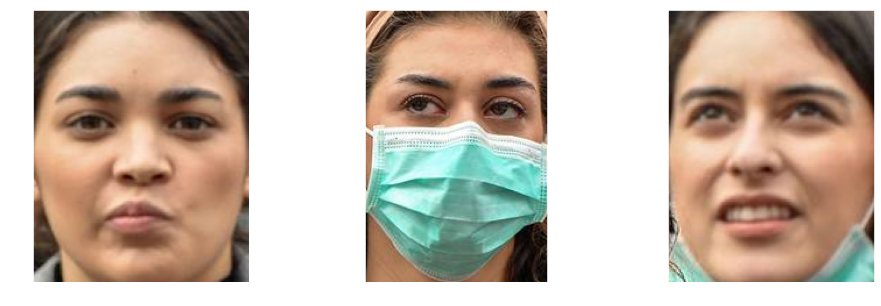

In [43]:
faces = []

for i in range(dets.shape[2]):
    confidence = dets[0, 0, i, 2]
    if confidence < 0.5:
        continue

    x1 = int(dets[0, 0, i, 3] * w)
    y1 = int(dets[0, 0, i, 4] * h)
    x2 = int(dets[0, 0, i, 5] * w)
    y2 = int(dets[0, 0, i, 6] * h)
    
    face = img[y1:y2, x1:x2]
    faces.append(face)

plt.figure(figsize=(16, 5))

for i, face in enumerate(faces):
    plt.subplot(1, len(faces), i+1)
    plt.imshow(face[:, :, ::-1])

# Detect Masks from Faces

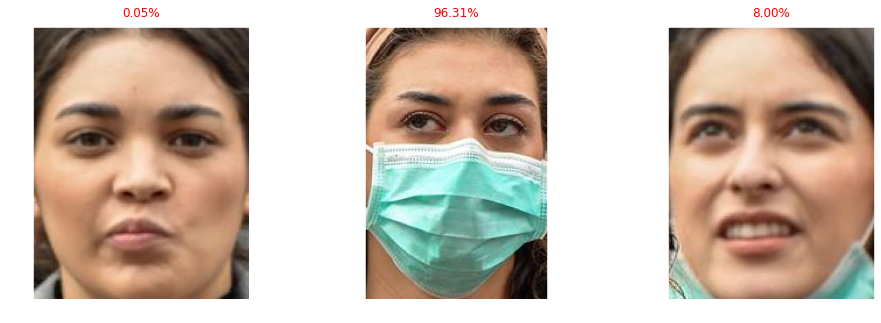

In [44]:
plt.figure(figsize=(16, 5))

for i, face in enumerate(faces):
    face_input = cv2.resize(face, dsize=(224, 224))
    face_input = cv2.cvtColor(face_input, cv2.COLOR_BGR2RGB)
    face_input = preprocess_input(face_input)
    face_input = np.expand_dims(face_input, axis=0)
    
    mask, nomask = model.predict(face_input).squeeze()

    plt.subplot(1, len(faces), i+1)
    plt.title('%.2f%%' % (mask * 100), loc='center', pad=10., color = 'red')
    plt.imshow(face[:, :, ::-1])
